In [1]:
# import dependancies
from config import password, user_name, api_key
import json
from pprint import pprint
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# determine the url for the api
url = 'https://api.rainforestapi.com/request'

In [3]:
# set up the request parameters
params = {
  'api_key': api_key,
  'type': 'bestsellers',
  'amazon_domain': 'amazon.ca',
  'category_id': 'bestsellers_books',
  'max_page': '5'
}

In [4]:
# make the http GET request to Rainforest API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    # Process the JSON response
    print(data)
else:
    print('Error:', response.status_code)

{'request_info': {'success': True, 'credits_used': 23, 'credits_used_this_request': 2, 'credits_remaining': 477, 'credits_reset_at': '2024-05-18T23:56:33.000Z'}, 'request_parameters': {'type': 'bestsellers', 'amazon_domain': 'amazon.ca', 'category_id': 'bestsellers_books', 'max_page': '5'}, 'request_metadata': {'created_at': '2024-04-22T02:27:28.673Z', 'processed_at': '2024-04-22T02:27:55.423Z', 'total_time_taken': 26.75, 'pages': [{'created_at': '2024-04-22T02:27:28.673Z', 'processed_at': '2024-04-22T02:27:41.673Z', 'total_time_taken': 13, 'page': 1, 'amazon_url': 'https://www.amazon.ca/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_nav_0'}, {'created_at': '2024-04-22T02:27:41.674Z', 'processed_at': '2024-04-22T02:27:55.423Z', 'total_time_taken': 13.75, 'page': 2, 'amazon_url': 'https://www.amazon.ca/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_nav_0?pg=2'}]}, 'bestsellers': [{'rank': 1, 'position': 1, 'title': 'A Court of Thorns and Roses Paperback Box Set (5 books)', 'asin': '1639

In [5]:
# pretty print the JSON response from Rainforest API
pprint(json.dumps(response.json()))

('{"request_info": {"success": true, "credits_used": 23, '
 '"credits_used_this_request": 2, "credits_remaining": 477, '
 '"credits_reset_at": "2024-05-18T23:56:33.000Z"}, "request_parameters": '
 '{"type": "bestsellers", "amazon_domain": "amazon.ca", "category_id": '
 '"bestsellers_books", "max_page": "5"}, "request_metadata": {"created_at": '
 '"2024-04-22T02:27:28.673Z", "processed_at": "2024-04-22T02:27:55.423Z", '
 '"total_time_taken": 26.75, "pages": [{"created_at": '
 '"2024-04-22T02:27:28.673Z", "processed_at": "2024-04-22T02:27:41.673Z", '
 '"total_time_taken": 13, "page": 1, "amazon_url": '
 '"https://www.amazon.ca/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_nav_0"}, '
 '{"created_at": "2024-04-22T02:27:41.674Z", "processed_at": '
 '"2024-04-22T02:27:55.423Z", "total_time_taken": 13.75, "page": 2, '
 '"amazon_url": '
 '"https://www.amazon.ca/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_nav_0?pg=2"}]}, '
 '"bestsellers": [{"rank": 1, "position": 1, "title": "A Court of Th

In [6]:
# convert to pandas datframe
response_json = response.json()

# extract the 'bestsellers' data
bestsellers_data = response_json.get('bestsellers', [])

# convert the 'bestsellers' data to a DataFrame
bestsellers_df = pd.DataFrame(bestsellers_data)

# display the DataFrame
print(bestsellers_df)

    rank  position                                              title  \
0      1         1  A Court of Thorns and Roses Paperback Box Set ...   
1      2         2         The Livy Method: Weight Loss Program Guide   
2      3         3                              The Covenant of Water   
3      4         4                Onyx Storm (Deluxe Limited Edition)   
4      5         5  The Anxious Generation: How the Great Rewiring...   
..   ...       ...                                                ...   
95    96        46  Peaceful Kitchen: More than 100 Cozy Plant-Bas...   
96    97        47  The Book. The Ultimate Guide to Rebuilding a C...   
97    98        48                                    The Clear Quran   
98    99        49                      A Good Girl's Guide to Murder   
99   100        50  Where the Crawdads Sing: Reese's Book Club (A ...   

          asin                                               link  \
0   1639730192  https://www.amazon.ca/Court-Thorns-Ros

In [7]:
# identify column names 
bestsellers_df.columns

Index(['rank', 'position', 'title', 'asin', 'link', 'sub_title', 'variant',
       'image', 'rating', 'ratings_total', 'price', 'current_category',
       'parent_category', 'page'],
      dtype='object')

In [8]:
# determine columns to drop and preview dataframe
columns_to_drop = ['position', 'asin', 'link', 'sub_title', 'image', 'current_category', 'parent_category',
       'page']
bestsellers_df.drop(columns=columns_to_drop, inplace=True)

# print results
print(bestsellers_df)

    rank                                              title    variant  \
0      1  A Court of Thorns and Roses Paperback Box Set ...  Paperback   
1      2         The Livy Method: Weight Loss Program Guide  Paperback   
2      3                              The Covenant of Water  Hardcover   
3      4                Onyx Storm (Deluxe Limited Edition)  Hardcover   
4      5  The Anxious Generation: How the Great Rewiring...  Hardcover   
..   ...                                                ...        ...   
95    96  Peaceful Kitchen: More than 100 Cozy Plant-Bas...  Hardcover   
96    97  The Book. The Ultimate Guide to Rebuilding a C...  Hardcover   
97    98                                    The Clear Quran  Paperback   
98    99                      A Good Girl's Guide to Murder  Paperback   
99   100  Where the Crawdads Sing: Reese's Book Club (A ...  Paperback   

    rating  ratings_total                                              price  
0      4.8        23541.0  {'sym

In [9]:
# display dataframe
bestsellers_df

,rank,title,variant,rating,ratings_total,price
0,1,A Court of Thorns and Roses Paperback Box Set ...,Paperback,4.8,23541.0,"{'symbol': '$', 'value': 69.99, 'currency': 'C..."
1,2,The Livy Method: Weight Loss Program Guide,Paperback,5.0,2.0,NaN
2,3,The Covenant of Water,Hardcover,4.6,56907.0,"{'symbol': '$', 'value': 27.96, 'currency': 'C..."
3,4,Onyx Storm (Deluxe Limited Edition),Hardcover,NaN,NaN,"{'symbol': '$', 'value': 28.36, 'currency': 'C..."
4,5,The Anxious Generation: How the Great Rewiring...,Hardcover,4.7,253.0,"{'symbol': '$', 'value': 27.36, 'currency': 'C..."
...,...,...,...,...,...,...
95,96,Peaceful Kitchen: More than 100 Cozy Plant-Bas...,Hardcover,NaN,NaN,"{'symbol': '$', 'value': 43.5, 'currency': 'CA..."
96,97,The Book. The Ultimate Guide to Rebuilding a C...,Hardcover,4.7,191.0,"{'symbol': '$', 'value': 169.14, 'currency': '..."
97,98,The Clear Quran,Paperback,4.8,2479.0,"{'symbol': '$', 'value': 15.95, 'currency': 'C..."
98,99,A Good Girl's Guide to Murder,Paperback,4.4,51051.0,"{'symbol': '$', 'value': 12.36, 'currency': 'C..."


In [10]:
# modify the 'price' column to handle both dictionaries and floats
bestsellers_df['price'] = bestsellers_df['price'].apply(lambda x: x['symbol'] + "{:.2f}".format(x['value']) if isinstance(x, dict) else x)

# display results
bestsellers_df

,rank,title,variant,rating,ratings_total,price
0,1,A Court of Thorns and Roses Paperback Box Set ...,Paperback,4.8,23541.0,$69.99
1,2,The Livy Method: Weight Loss Program Guide,Paperback,5.0,2.0,NaN
2,3,The Covenant of Water,Hardcover,4.6,56907.0,$27.96
3,4,Onyx Storm (Deluxe Limited Edition),Hardcover,NaN,NaN,$28.36
4,5,The Anxious Generation: How the Great Rewiring...,Hardcover,4.7,253.0,$27.36
...,...,...,...,...,...,...
95,96,Peaceful Kitchen: More than 100 Cozy Plant-Bas...,Hardcover,NaN,NaN,$43.50
96,97,The Book. The Ultimate Guide to Rebuilding a C...,Hardcover,4.7,191.0,$169.14
97,98,The Clear Quran,Paperback,4.8,2479.0,$15.95
98,99,A Good Girl's Guide to Murder,Paperback,4.4,51051.0,$12.36


In [11]:
# remove the NaN values and display results
bestsellers_df.dropna()

,rank,title,variant,rating,ratings_total,price
0,1,A Court of Thorns and Roses Paperback Box Set ...,Paperback,4.8,23541.0,$69.99
2,3,The Covenant of Water,Hardcover,4.6,56907.0,$27.96
4,5,The Anxious Generation: How the Great Rewiring...,Hardcover,4.7,253.0,$27.36
6,7,Atomic Habits: An Easy & Proven Way to Build G...,Hardcover,4.7,159283.0,$23.27
7,8,The 48 Laws of Power,Paperback,4.6,73605.0,$23.11
...,...,...,...,...,...,...
93,94,Rich Dad Poor Dad: What the Rich Teach Their K...,Mass Market Paperback,4.7,94492.0,$12.99
96,97,The Book. The Ultimate Guide to Rebuilding a C...,Hardcover,4.7,191.0,$169.14
97,98,The Clear Quran,Paperback,4.8,2479.0,$15.95
98,99,A Good Girl's Guide to Murder,Paperback,4.4,51051.0,$12.36


In [12]:
# export file as a csv file to be used again
bestsellers_df.to_csv('data/books.csv', index=False)

In [27]:
# Apply a lambda function to each element in the 'price' column of the 'bestsellers_df' DataFrame
# If the element is a dictionary, return the value associated with the 'value' key
# If the element is not a dictionary, return the element as is
bestsellers_df['price'] = bestsellers_df['price'].apply(lambda x: x['value'] if isinstance(x, dict) else x)

# Apply another lambda function to each element in the 'price' column of the 'bestsellers_df' DataFrame
# If the element is a float, format it as a string with two decimal places
# If the element is not a float, assume it is a string and remove the dollar sign
bestsellers_df['price'] = bestsellers_df['price'].apply(lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x.replace('$', ''))

# Find the index of the highest and lowest priced items
highest_priced_index = bestsellers_df['price'].idxmax()
lowest_priced_index = bestsellers_df['price'].idxmin()

# Print the title of the highest and lowest priced items
print('The highest priced book is:',bestsellers_df.loc[highest_priced_index, 'title'])
print('The lowest priced book is:' ,bestsellers_df.loc[lowest_priced_index, 'title'])

The highest priced book is: The Livy Method: Weight Loss Program Guide
The lowest priced book is: I Love You to the Moon and Back


In [23]:
# find the index of the highest and lowest ratings_total items
highest_index = bestsellers_df['ratings_total'].idxmax()
lowest_index = bestsellers_df['ratings_total'].idxmin()

# print the highest and lowest ratings_total items
print('The most rated book is:', bestsellers_df.loc[highest_index, 'title'])
print('The least rated book is:', bestsellers_df.loc[lowest_index, 'title'])

The most rated book is: Where the Crawdads Sing: Reese's Book Club (A Novel)
The least rated book is: The Livy Method: Weight Loss Program Guide


In [24]:
# find the index of the highest and lowest rated items
best_rated_index = bestsellers_df['rating'].idxmax()
worst_rated_index = bestsellers_df['rating'].idxmin()

# print the index of the highest and lowest rated items
print('The best rated book is:', bestsellers_df.loc[best_rated_index, 'title'])
print('The worst rated book is:', bestsellers_df.loc[worst_rated_index, 'title'])

The best rated book is: The Livy Method: Weight Loss Program Guide
The worst rated book is: The Peace: A Warrior's Journey


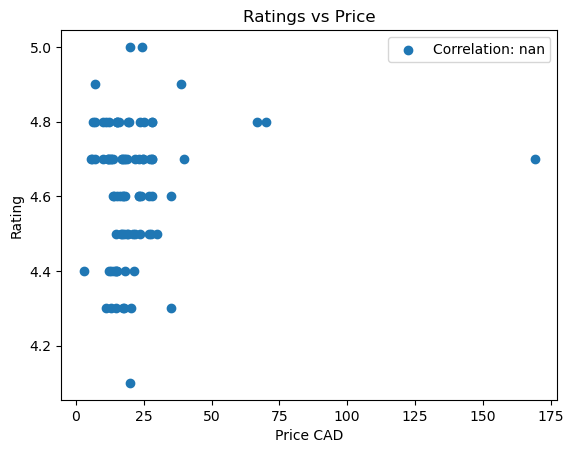

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
data = pd.read_csv('/Users/chac/Desktop/Class/Project_3/Project-3/data/books.csv') #change the path to your own

# Preprocess the price column by removing the dollar signs
data['price'] = data['price'].str.replace('$', '')

# Convert the price column to float
data['price'] = data['price'].astype(float)

# Calculate the correlation coefficient
correlation = np.corrcoef(data['price'], data['rating'])[0, 1]

# Calculate the slope and intercept of the correlation line
slope = correlation / np.std(data['price'])
intercept = np.mean(data['rating']) - slope * np.mean(data['price'])

# Generate the plot comparing price vs rating
plt.title('Ratings vs Price')
plt.scatter(data['price'], data['rating'], label='Correlation: {:.2f}'.format(correlation))
plt.xlabel('Price CAD')
plt.ylabel('Rating')
plt.legend()
plt.plot(data['price'], slope * data['price'] + intercept, 'r-', label='Correlation Line')
plt.show()

plt.savefig('images/books_corr.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


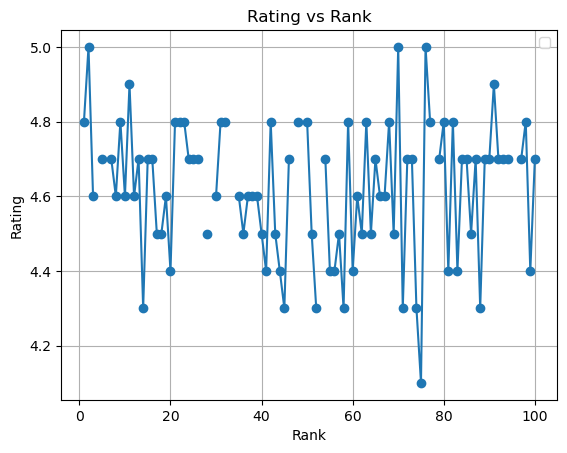

<Figure size 640x480 with 0 Axes>

In [5]:
# Preprocess the rank column by converting it to integer
data['rank'] = data['rank'].astype(int)

# Generate the line plot comparing rank vs rating
plt.title('Rating vs Rank')
plt.plot(data['rank'], data['rating'], marker='o', linestyle='-')
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('images/books_line.png')